<a href="https://colab.research.google.com/github/utkarshs75/Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

1. step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

2. type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

3. amount - amount of the transaction in local currency.

4. nameOrig - customer who started the transaction

5. oldbalanceOrg - initial balance before the transaction

6. newbalanceOrig - new balance after the transaction

7. nameDest - customer who is the recipient of the transaction

8. oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

9. newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

10. isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

11. isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
# Importing all required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Imorting data from Fraud.csv into a DataFrame

data = pd.read_csv('/content/drive/MyDrive/Interview Assignments/Insaid/Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [51]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [53]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2630585,209,TRANSFER,942006.79,C435047113,0.00,0.00,C1573821914,1722475.79,2664482.58,0,0
5213354,370,CASH_IN,215593.87,C796953688,6018.00,221611.87,C1137520529,11836909.74,11621315.87,0,0
554727,22,CASH_OUT,6707.92,C1380660145,12371.00,5663.08,C1965828685,1701130.57,1707838.48,0,0
6112504,526,PAYMENT,26027.51,C1569544844,44301.66,18274.15,M755011425,0.00,0.00,0,0
43954,9,CASH_OUT,367174.91,C1121832015,161721.00,0.00,C1005747091,162697.48,529872.39,0,0


Checking other attributes of data

In [7]:
data.shape

(6362620, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [41]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [40]:
data.describe(include = ['O'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


## Data Cleaning and EDA

In [ ]:
# Fixing the default Figure size

plt.rcParams['figure.figsize'] = (8, 4)
#plt.rcParams['font.size'] = 8
plt.tick_params(axis = 'both', which = 'major', size = 10)
plt.tick_params(axis = 'both', which = 'minor', size = 8)

As we can see from the preliminary glance at the data, there's no missing values, and all the data is in correct data types. Hence, we look inside each particular column for any irregularities.

**1. Target Variable**

In [13]:
# It's a categorical variable so we check value counts
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

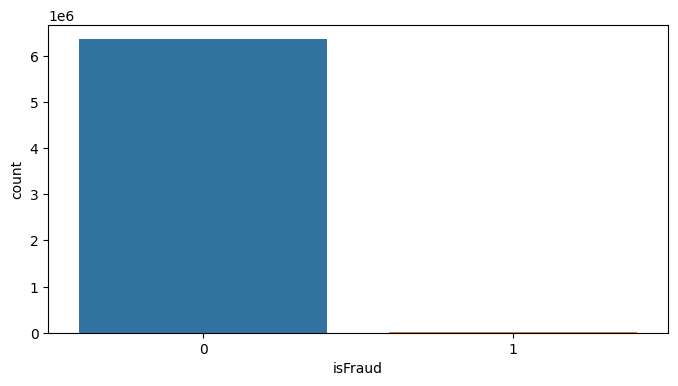

In [14]:
# Visualizing isFraud column

sns.countplot(x = 'isFraud', data = data)
plt.show()

**2. Flagged Fraud**

In [54]:
# Checking the amount of correctly flagged data

flag_right = data[data['isFraud'] == data['isFlaggedFraud']].shape[0]
flag_wrong = data[data['isFraud'] != data['isFlaggedFraud']].shape[0]

print('Percentage pf Correctly Flagged Data:', np.round(flag_right*100/(flag_right+flag_wrong), 2), '%')

Percentage pf Correctly Flagged Data: 99.87 %


We see that most of the data has been flagged correctly. However since our goal is to identify Fraud, we check the distribution of data in the feature.

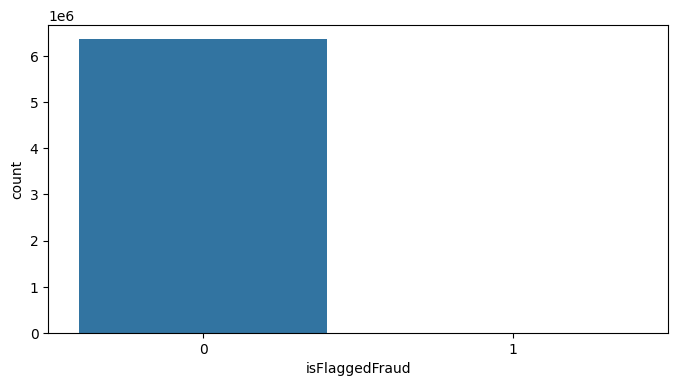

In [55]:
# Visualizing isFlaggedFraud column

sns.countplot(x = 'isFlaggedFraud', data = data)
plt.show()

In [56]:
# It's a categorical variable so we check value counts
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [57]:
# Comparing Flagged with actual fraud data

print('Confusion Matrix:')
print(confusion_matrix(data['isFlaggedFraud'], data['isFraud']))

Confusion Matrix:
[[6354407    8197]
 [      0      16]]


We see, that only 16 out of 8213 values have been correctly Flagged as Fraud, which is about 0.19%

It means that this feature is **NOT** able to detect 99.8% of fraud cases. This could be because it only takes into account massive transactions (above 200k).

This does not hold much significance for our modelling purposes, so we remove this feature.

In [5]:
data = data.drop(['isFlaggedFraud'], axis = 1)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


**3. Step**

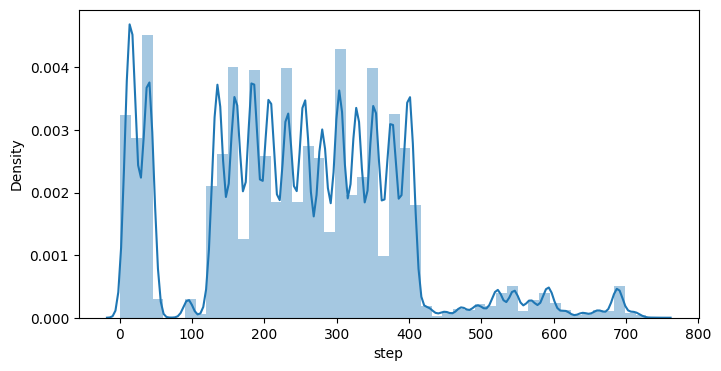

In [20]:
# Visualing distribution of steps

sns.distplot(data['step'])
plt.show()

**4. Type**

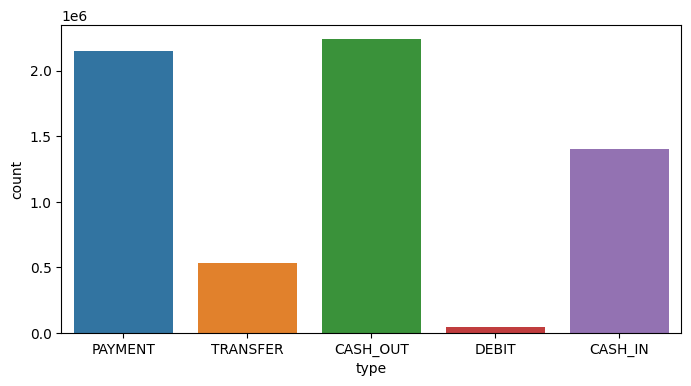

In [21]:
# Dostribution of Types of transactions

sns.countplot(x = 'type', data = data)
plt.show()

**5. Origin and Destination balance details**

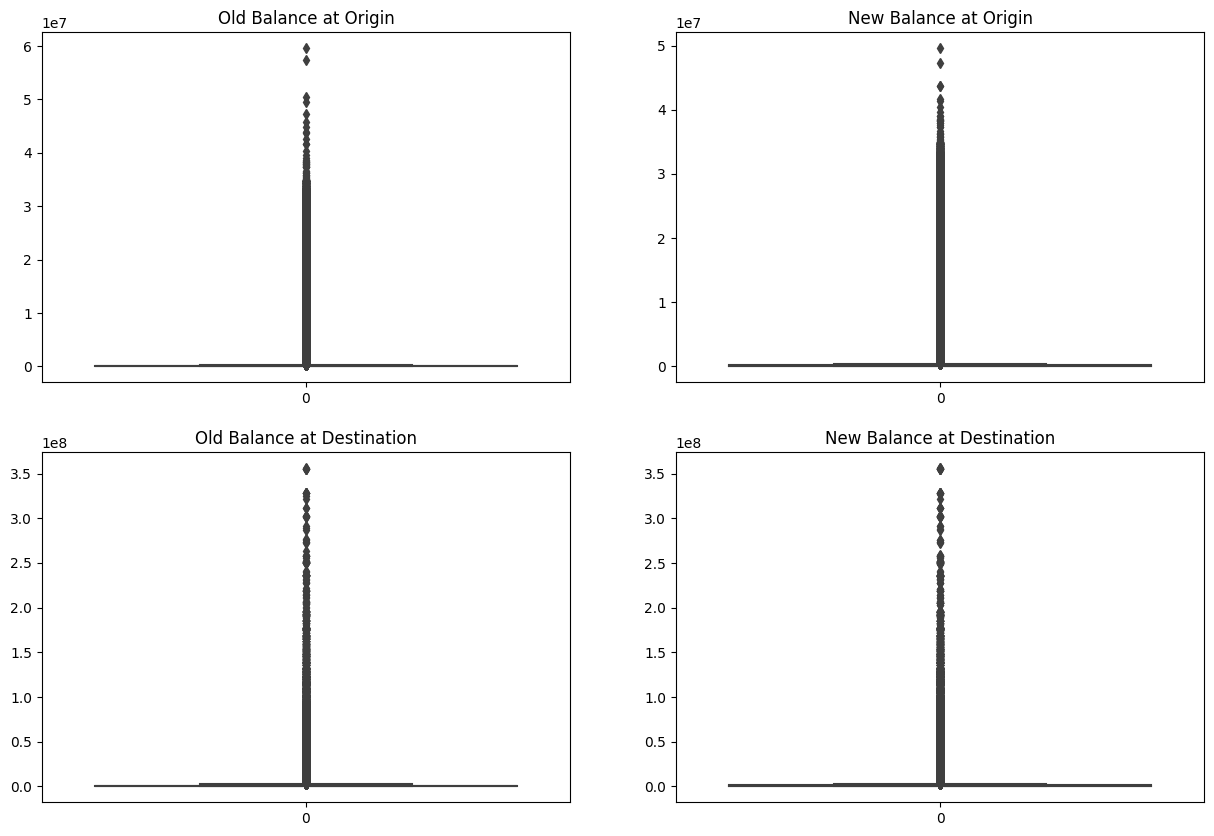

In [22]:
# Plotting a combined boxplot of origin and destination balances.

plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(data['oldbalanceOrg'])
plt.title('Old Balance at Origin')
plt.subplot(2, 2, 2)
sns.boxplot(data['newbalanceOrig'])
plt.title('New Balance at Origin')
plt.subplot(2, 2, 3)
sns.boxplot(data['oldbalanceDest'])
plt.title('Old Balance at Destination')
plt.subplot(2, 2, 4)
sns.boxplot(data['newbalanceDest'])
plt.title('New Balance at Destination')
plt.show()

**6. Names of Sender and Recepient**

It has been mentioned that the data for merchants is not available. This is probably because it consists of payments to merchants, and is unlikely to be a Fraud.

Since in this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system, transferring it as a payment to a merchant will defeat the purpose and will likely disclose the identity and open the Fraudulant Ajent to an array of issues.

We check this hypothesis by checking the type of transactions, and checking the amount in the Destination.

In [23]:
a = data[data['type'] == 'PAYMENT']
if len(a['isFraud'].unique()) == 1:
  print('Number of Fraudulant Payments is 0')
else:
  print('Fraudulant Payments found.')

Number of Fraudulant Payments is 0


In [24]:
a['isFraud'].unique()

array([0])

No Fraudulant payments present.

In [25]:
# Reverse checking:
b = data[data['nameDest'].str.contains('M') ]
print('List of Destination Names containg M:', [i for i in list(b['type'].unique())])

List of Destination Names containg M: ['PAYMENT']


In [26]:
if a.shape == b.shape:
  print('Both are same')
else:
  print('Data discrepancy')

Both are same


Hence, we can remove all payment data, as merchant data is unavailable and **0** Fraudulant transactions observed.

In [6]:
data = data[data['type'] != 'PAYMENT']
data.shape

(4211125, 10)

## Data Preprocessing

In [60]:
# Taking a look at presently available features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4211125 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 353.4+ MB


We can remove nameOrig and nameDest columns because they are of object type and no additional useful information is recieved from them.

In [7]:
data = data.drop(['nameOrig', 'nameDest'], axis  = 1)
data.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1144959,131,CASH_OUT,100765.39,12085.53,0.00,249870.46,350635.85,0
6123930,540,CASH_IN,309705.41,2474321.00,2784026.41,1913503.02,1603797.61,0
1117045,130,CASH_IN,281296.77,24266117.70,24547414.46,829297.37,548000.60,0
2456187,203,CASH_IN,144607.48,1416437.96,1561045.44,440625.56,296018.08,0
1810138,163,CASH_IN,27042.85,5284.00,32326.85,1875966.22,1848923.37,0


One Hot Encoding the type of transaction to convert it to categorical.

In [8]:
data = pd.get_dummies(data, columns = ['type'])

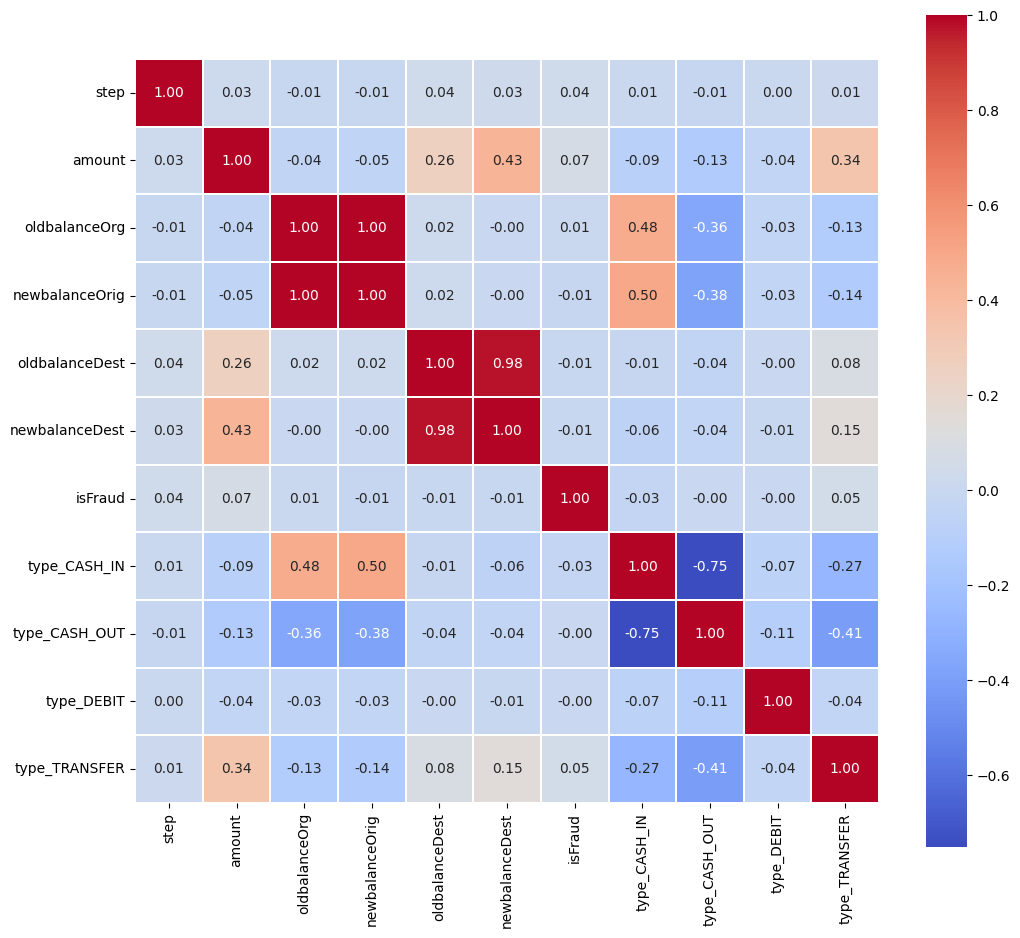

In [63]:
# Creating a heatmap of correlation matrix

fig, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot = True, ax = axes, linewidths = 0.1, fmt = '.2f', square = True, cbar_kws = {'shrink': 0.9}, cmap = 'coolwarm')
plt.show()

Since old and new balance columns are highly correlated, we only select one of them to remove multicollinearity. To choose which one, we use the one which is least correlated with other variables.

In [67]:
# Origin Balance

print('Old Balance Origin:', sum(data.corr()['oldbalanceOrg']))
print('New Balance Origin:', sum(data.corr()['newbalanceOrig']))

Old Balance Origin: 1.9302964500832456
New Balance Origin: 1.9025151875630053


In [9]:
data = data.drop(['oldbalanceOrg'], axis = 1)

In [68]:
# Destination Balance

print('Old Balance Destination:', sum(data.corr()['oldbalanceDest']))
print('New Balance Destination:', sum(data.corr()['newbalanceDest']))

Old Balance Destination: 2.331718174185942
New Balance Destination: 2.468650577593465


In [10]:
data = data.drop(['newbalanceDest'], axis = 1)

In [103]:
data.corr()

,step,amount,newbalanceOrig,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER,isFraud
step,1.000000,0.028621,-0.010141,0.036444,0.007911,-0.014947,0.003888,0.010072,0.039035
amount,0.028621,1.000000,-0.048015,0.260521,-0.093235,-0.129964,-0.035566,0.337723,0.073082
newbalanceOrig,-0.010141,-0.048015,1.000000,0.024044,0.500363,-0.375631,-0.033817,-0.135059,-0.013400
oldbalanceDest,0.036444,0.260521,0.024044,1.000000,-0.013040,-0.043300,-0.004167,0.084704,-0.012167
type_CASH_IN,0.007911,-0.093235,0.500363,-0.013040,1.000000,-0.751116,-0.070319,-0.268513,-0.031184
type_CASH_OUT,-0.014947,-0.129964,-0.375631,-0.043300,-0.751116,1.000000,-0.106137,-0.405282,-0.002673
type_DEBIT,0.003888,-0.035566,-0.033817,-0.004167,-0.070319,-0.106137,1.000000,-0.037942,-0.004406
type_TRANSFER,0.010072,0.337723,-0.135059,0.084704,-0.268513,-0.405282,-0.037942,1.000000,0.049501
isFraud,0.039035,0.073082,-0.013400,-0.012167,-0.031184,-0.002673,-0.004406,0.049501,1.000000


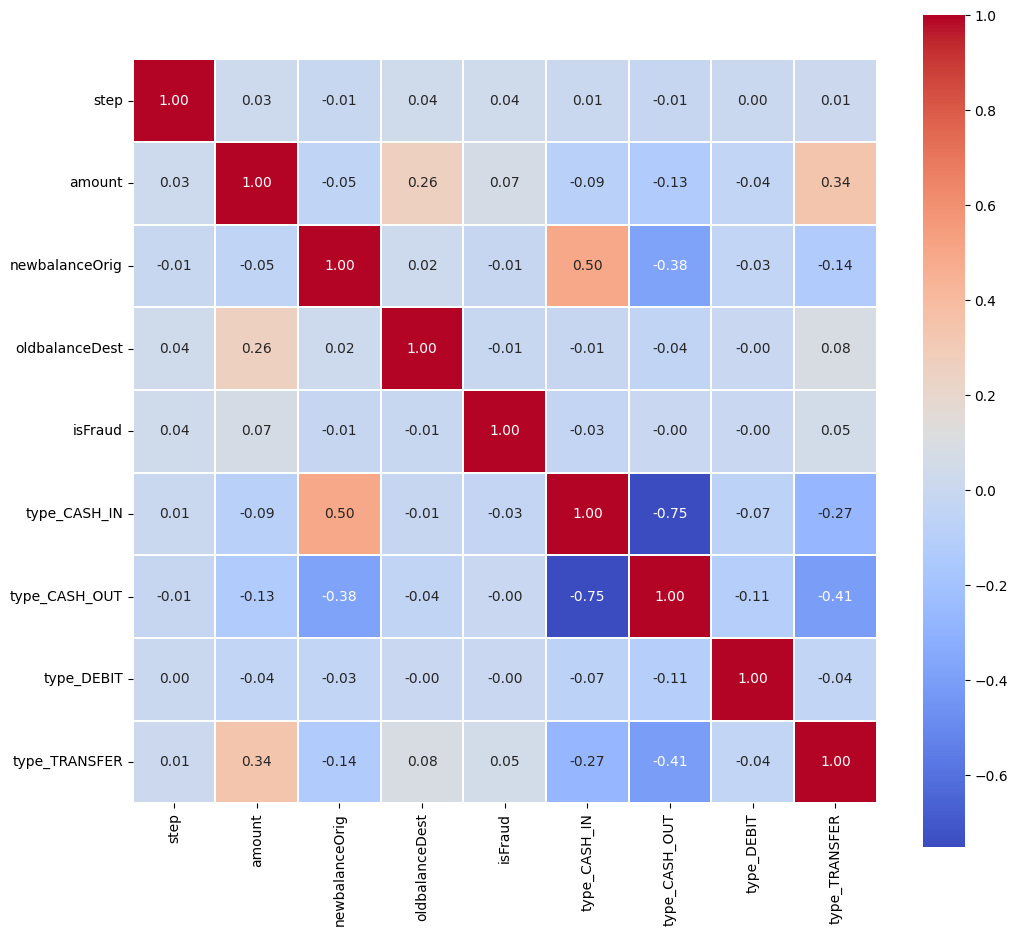

In [75]:
# Creating a heatmap of correlation matrix again

fig, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot = True, ax = axes, linewidths = 0.1, fmt = '.2f', square = True, cbar_kws = {'shrink': 0.9}, cmap = 'coolwarm')
plt.show()

Now type_CASH_IN and type_CASH_OUT are negatively correlated, but that is understandable because they are opposites.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4211125 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   isFraud         int64  
 5   type_CASH_IN    uint8  
 6   type_CASH_OUT   uint8  
 7   type_DEBIT      uint8  
 8   type_TRANSFER   uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 208.8 MB


## Model Building

In [12]:
# Moving the target variable to the last column
a = data['isFraud']
data = data.drop(['isFraud'], axis = 1)
data['isFraud'] = a
data.head()

,step,amount,newbalanceOrig,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_TRANSFER,isFraud
2,1,181.00,0.00,0.0,0,0,0,1,1
3,1,181.00,0.00,21182.0,0,1,0,0,1
9,1,5337.77,36382.23,41898.0,0,0,1,0,0
10,1,9644.94,0.00,10845.0,0,0,1,0,0
15,1,229133.94,0.00,5083.0,0,1,0,0,0


In [13]:
# Creating X and Y variables in array format
array = data.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X\n', X)
print('Split Data: Y\n', Y)

Split Data: X
 [[1.00000000e+00 1.81000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.81000000e+02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.33777000e+03 3.63822300e+04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [7.43000000e+02 6.31140928e+06 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.43000000e+02 8.50002520e+05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.43000000e+02 8.50002520e+05 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Split Data: Y
 [1. 1. 0. ... 1. 1. 1.]


In [24]:
# Dividing into training and validation sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### Logistic Regression Model

In [87]:
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)

LogisticRegression()

In [88]:
Y_pred1 = LR_model.predict(X_test)

> Model Evalulation

In [89]:
# Calculating Accuracy Score

acc1 = accuracy_score(Y_test, Y_pred1)
print('1. Accuracy of Logistic Regression Model:', acc1)

1. Accuracy of Logistic Regression Model: 0.9980682121760812


In [90]:
# Printing Confusion Matrix

cf1 = confusion_matrix(Y_test, Y_pred1)
print('2. Confusion Matrix:\n\n', cf1)

2. Confusion Matrix:

 [[840598      0]
 [  1627      0]]


In [91]:
# Printing Classification Report

cr1 = classification_report(Y_test, Y_pred1)
print('3. Classification Report:\n\n', cr1)

3. Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    840598
         1.0       0.00      0.00      0.00      1627

    accuracy                           1.00    842225
   macro avg       0.50      0.50      0.50    842225
weighted avg       1.00      1.00      1.00    842225



#### K Nearest Neighbour Model

In [30]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [32]:
Y_pred2 = KNN_model.predict(X_test)

> Model Evalulation

In [49]:
# Calculating Accuracy Score

acc2 = accuracy_score(Y_test, Y_pred2)
print('1. Accuracy of KNN Model:', acc2)

1. Accuracy of KNN Model: 0.9980622755201994


In [50]:
# Printing Confusion Matrix

cf2 = confusion_matrix(Y_test, Y_pred2)
print('2. Confusion Matrix:\n\n', cf2)

2. Confusion Matrix:

 [[840505     93]
 [  1539     88]]


In [51]:
# Printing Classification Report

cr2 = classification_report(Y_test, Y_pred2)
print('3. Classification Report:\n\n', cr2)

3. Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    840598
         1.0       0.49      0.05      0.10      1627

    accuracy                           1.00    842225
   macro avg       0.74      0.53      0.55    842225
weighted avg       1.00      1.00      1.00    842225



#### Decision Tree Model

In [52]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [53]:
Y_pred3 = DT_model.predict(X_test)

> Model Evalulation

In [54]:
# Calculating Accuracy Score

acc3 = accuracy_score(Y_test, Y_pred3)
print('1. Accuracy of Decision Tree Model:', acc3)

1. Accuracy of Decision Tree Model: 0.9983650449701683


In [55]:
# Printing Confusion Matrix

cf3 = confusion_matrix(Y_test, Y_pred3)
print('2. Confusion Matrix:\n\n', cf3)

2. Confusion Matrix:

 [[839934    664]
 [   713    914]]


In [56]:
# Printing Classification Report

cr3 = classification_report(Y_test, Y_pred3)
print('3. Classification Report:\n\n', cr3)

3. Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    840598
         1.0       0.58      0.56      0.57      1627

    accuracy                           1.00    842225
   macro avg       0.79      0.78      0.78    842225
weighted avg       1.00      1.00      1.00    842225



#### Naive Bayes Classifier Model

In [57]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [58]:
Y_pred4 = NB_model.predict(X_test)

> Model Evalulation

In [60]:
# Calculating Accuracy Score

acc4 = accuracy_score(Y_test, Y_pred4)
print('1. Accuracy of NB Classifier Model:', acc4)

1. Accuracy of NB Classifier Model: 0.9938401258571047


In [61]:
# Printing Confusion Matrix

cf4 = confusion_matrix(Y_test, Y_pred4)
print('2. Confusion Matrix:\n\n', cf4)

2. Confusion Matrix:

 [[836777   3821]
 [  1367    260]]


In [62]:
# Printing Classification Report

cr4 = classification_report(Y_test, Y_pred4)
print('3. Classification Report:\n\n', cr4)

3. Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    840598
         1.0       0.06      0.16      0.09      1627

    accuracy                           0.99    842225
   macro avg       0.53      0.58      0.54    842225
weighted avg       1.00      0.99      1.00    842225



#### Random Forest Classifier Model

In [63]:
RF_model = RandomForestClassifier(n_estimators = 100)
RF_model.fit(X_train, Y_train)

RandomForestClassifier()

In [64]:
Y_pred5 = RF_model.predict(X_test)

> Model Evalulation

In [65]:
# Calculating Accuracy Score

acc5 = accuracy_score(Y_test, Y_pred5)
print('1. Accuracy of Random Forest Classifier Model:', acc5)

1. Accuracy of Random Forest Classifier Model: 0.9988732227136454


In [66]:
# Printing Confusion Matrix

cf5 = confusion_matrix(Y_test, Y_pred5)
print('2. Confusion Matrix:\n\n', cf5)

2. Confusion Matrix:

 [[840476    122]
 [   827    800]]


In [67]:
# Printing Classification Report

cr5 = classification_report(Y_test, Y_pred5)
print('3. Classification Report:\n\n', cr5)

3. Classification Report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    840598
         1.0       0.87      0.49      0.63      1627

    accuracy                           1.00    842225
   macro avg       0.93      0.75      0.81    842225
weighted avg       1.00      1.00      1.00    842225



## Finalize Model

In [70]:
print('1. Accuracy of Logistic Regression Model:\t\t', acc1)
print('2. Accuracy of K Nearest Neighbour Model:\t\t', acc2)
print('3. Accuracy of Decision Tree Classifier Model:\t\t', acc3)
print('4. Accuracy of Gaussian Naive Bayes Classifier Model:\t', acc4)
print('5. Accuracy of Random Forest Classifier Model:\t\t', acc5)

1. Accuracy of Logistic Regression Model:		 0.9980682121760812
2. Accuracy of K Nearest Neighbour Model:		 0.9980622755201994
3. Accuracy of Decision Tree Classifier Model:		 0.9983650449701683
4. Accuracy of Gaussian Naive Bayes Classifier Model:	 0.9938401258571047
5. Accuracy of Random Forest Classifier Model:		 0.9988732227136454


As we can see, Random Forest Classifier Model is the best performing model.

In [94]:
# Sensitivity of RF Model

sen = cf5[0, 0]/(cf5[0, 0] + cf5[1, 0])
print('Sensitivity/Recall:', sen)

Sensitivity/Recall: 0.9990170010091489


In [95]:
# Specificity of RF Model

sp = cf5[1, 1]/(cf5[1, 1] + cf5[0, 1])
print('Specificity:', sp)

Specificity: 0.8676789587852495


In [96]:
# Precision of Model

pre = cf5[0,0]/(cf5[0, 0] + cf5[0, 1])
print('Precision:', pre)

Precision: 0.999854865226898


In [98]:
# F1 score of Model

f1 = 2*pre*sen/(pre+sen)
print('F1 score:', f1)

F1 score: 0.9994357575148597


In [78]:
# Determining Feature Importance

importance = RF_model.feature_importances_
cols = list(data.columns)
cols.remove('isFraud')
df = pd.DataFrame({'Feature': cols, 'Importance': importance})
df.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
1,amount,0.439647
0,step,0.366813
3,oldbalanceDest,0.118683
7,type_TRANSFER,0.032844
5,type_CASH_OUT,0.026717
2,newbalanceOrig,0.014578
4,type_CASH_IN,0.000697
6,type_DEBIT,0.000021


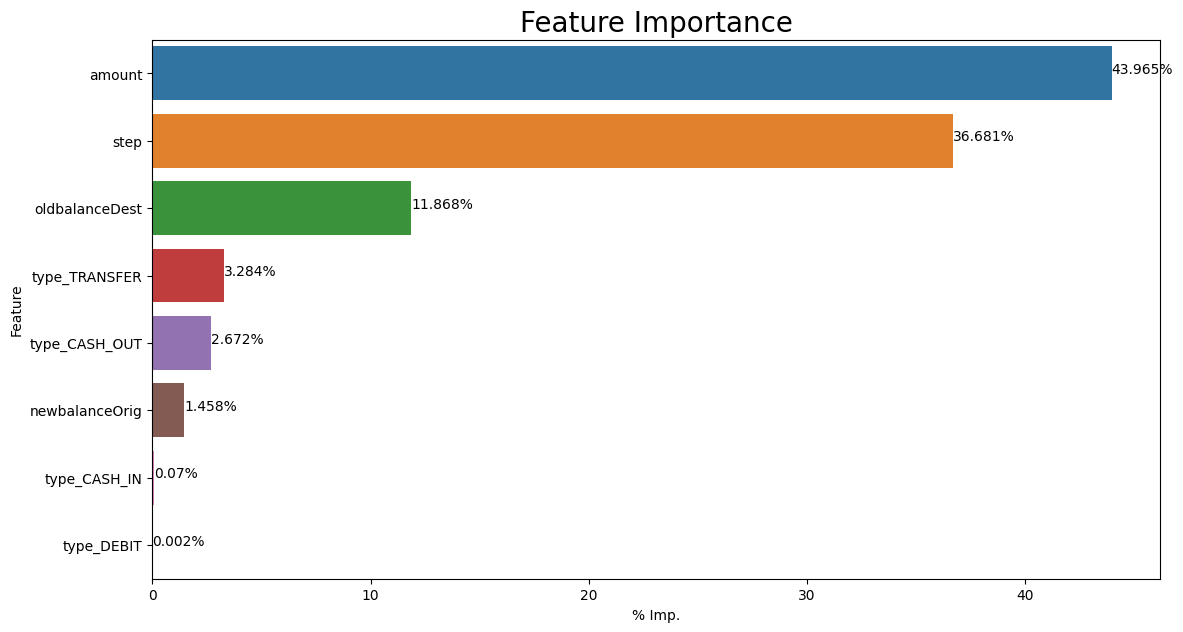

In [85]:
# Visualizing through a plot

df['% Imp.'] = df['Importance'] * 100
df.sort_values(by = ['% Imp.'], ascending = False, inplace = True)
plt.figure(figsize = (13, 7))
plt.title('Feature Importance', fontsize = 20)
sns.barplot(x = '% Imp.', y = 'Feature', data = df, orient = 'h')
for i, val in enumerate(df['% Imp.']):
  plt.text(val, i, str(round(val, 3))+'%')
plt.show()

## Post Modelling Discussion

1. Data Cleaning and Processing - Done.
--------------------------------------------------------------------------------

2. Model Description:

The task at hand was to build a Fraud detection model using Finantial Company Data. First we divided the data into training and testing sets. Next, we built 5 different models to classify the transactions in the data as Fraud and not Fraud transactions namely:
* Logistic Regression
* K Nearest Neighbours
* Gaussian Naive Bayes Classifier
* Logistic Regression
* Random Forest Regressor

Amongst these, the best performing model was *Random Forest Regressor*. It was chosen based upon its highest accuracy score.

--------------------------------------------------------------------------------

3. Variable Selection:

We chose variables based upon multiple criteria.
* First, isFlaggedFraud was removed on the account of it not revealing any new information and extremely correlated to the target variable. Also, it was based on a simple criteria of amount more than 200k, which would have been accounted for when modelling.
* Next, as per the information provided in the data description, merchants data was unavailable. So Payments type data was removed. Also, all of the payments type data was not Fraudulant as explained above.
* Next, we converted type data from object type to categorical.
* We chose all numerical variables and removed multicollinearity by eleminating highly correlated variables.
--------------------------------------------------------------------------------

4. We used multiple Evalulation metrics:
* Accuracy score - 0.9989
* Precision - 0.9999
* Recall - 0.9990
* Specificity - 0.8677
* F1 score - 0.9994

We found these values using confusion matrix, and printed a classification report of the model.

--------------------------------------------------------------------------------

5. From our model and analysis, we made the following discoveries:
* The most important factor is the amount, i.e. most Fraudulent ajents tend to transfer huge amount of money in the transactions.
* Next is the step, the higher steps might correlate with higher Fraudulent transactions.
* Third is the Account Balance of Destination Account, if the increment is huge, it could indicate Fraudulent transaction.
* After that are the transaction types. Aparantly, more fraudulent transaction tend to be done using account transfer than others.
* Either way, top 3 Features account for over 92.5% of Feature Importance. So others create smaller effect.

--------------------------------------------------------------------------------

6. Factors making sense:

* Yes, these factors make perfect sense, as it would be expected that a Fraudulent ajent would prefer to move as much amount as possible in each transaction to minimize the number of transactions and maximize the profit.
* This is also confirmed by our isFlaggedFraud data, as all 16 transactions above 200.000 units were correctly flagged as fraudulent.
* The Destination account balance increment also makes perfect sense as the Fraud ajent would prefer emptying account frequently lest the account be shut down if caught.
* Money transfer should be the most preferred method, as it would be most effective, efficient and error proof amongst all.

--------------------------------------------------------------------------------

7. Several prevention methods could be adopted:
* A cap on the transfer amount could be applied. It would be most effective in lowering the fraudulent transactions. This would also mean that the ajent will need to make multiple transactions to transfer same amount, making it easier to detect and flag for multiple transactions to same account with max limit.
* Limiting daily number of transactions along with previous step will also help in preventing Fraud.
* Monitoring accounts making quick and frequent withdrawals can be helpful. A fraudulent ajent will need to empty account frequently to minimize loss upon discovery.
* Setting up a minimum balance limit along with previous step will also help with preventing Fraud.
* Setting up a limit on Transfer and cash withdrawl should also help deter Fraudulent ajents.
* Notifying customers immediately on each Transfer or Withdrawl should also help detect a Fraud transaction quickly.

--------------------------------------------------------------------------------

8. To determine if they work, we can perform the Fraud Detection analysis again with another 1 month's data to see if the number of Fraudulent transactions have reduced.

--------------------------------------------------------------------------------

In [86]:
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#The End
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

''